# Unsupervised Learning Final Project Solutions

This is the final project for the **Data Science in Python: Unsupervised Learning** course. This notebook is split into seven sections:
1. Data Prep & EDA
2. K-Means Clustering
3. PCA for Visualization
4. K-Means Clustering (Round 2)
5. PCA for Visualization (Round 2)
6. EDA on Clusters
7. Make Recommendations

## 0. Goal & Scope

**GOAL**: You are trying to better understand the company’s different segments of employees and how to increase employee retention within each segment.

**SCOPE**: Your task is to use a clustering technique to segment the employees, a dimensionality reduction technique to visualize the segments, and finally explore the clusters to make recommendations to increase retention.

## 1. Data Prep & EDA

### a. Data Prep: Check the data types

The data can be found in the `employee_data.csv` file.

In [22]:
# read in the employee data
import pandas as pd

employee_data = pd.read_csv('../Data/employee_data.csv')
employee_data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [23]:
# note the number of rows and columns
employee_data.shape

(1470, 10)

In [24]:
# view the data types of all the columns
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         1470 non-null   int64 
 1   Age                1470 non-null   int64 
 2   Gender             1470 non-null   object
 3   DistanceFromHome   1470 non-null   int64 
 4   JobLevel           1470 non-null   int64 
 5   Department         1470 non-null   object
 6   MonthlyIncome      1470 non-null   int64 
 7   PerformanceRating  1470 non-null   int64 
 8   JobSatisfaction    1470 non-null   int64 
 9   Attrition          1470 non-null   object
dtypes: int64(7), object(3)
memory usage: 115.0+ KB


In [25]:
# look at the numeric columns
employee_data.dtypes[employee_data.dtypes == 'int64']

EmployeeID           int64
Age                  int64
DistanceFromHome     int64
JobLevel             int64
MonthlyIncome        int64
PerformanceRating    int64
JobSatisfaction      int64
dtype: object

In [26]:
# look at the non-numeric columns
employee_data.dtypes[employee_data.dtypes != 'int64']

Gender        object
Department    object
Attrition     object
dtype: object

### b. Data Prep: Convert the data types

Use `np.where` and `pd.get_dummies` to create a DataFrame for modeling where all fields are numeric.

In [27]:
# create a copy of the dataframe
data = employee_data.copy()
data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [28]:
# look at the gender values
data.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [29]:
# change gender into a numeric field using np.where
import numpy as np

data.Gender = np.where(data.Gender == 'Female', 1, 0)
data.Gender.head()

0    1
1    0
2    0
3    1
4    0
Name: Gender, dtype: int32

In [30]:
# look at the attrition values
data.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [31]:
# change attrition to a numeric field using np.where
data.Attrition = np.where(data.Attrition == 'Yes', 1, 0)
data.Attrition.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [32]:
# look at the department values
data.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [33]:
pd.get_dummies(data.Department)  # True, False

,Human Resources,Research & Development,Sales
0,False,False,True
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
1465,False,True,False
1466,False,True,False
1467,False,True,False
1468,False,False,True


In [34]:
# change department to a numeric field via dummy variables
pd.get_dummies(data.Department).astype('int').head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [35]:
# attach the columns back on to the dataframe
data = pd.concat([data, pd.get_dummies(data.Department).astype('int')], axis=1)
data.drop('Department', axis=1, inplace=True)
data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,1,0,0,1
1,1002,49,0,8,2,5130,4,2,0,0,1,0
2,1004,37,0,2,1,2090,3,3,1,0,1,0
3,1005,33,1,3,1,2909,3,3,0,0,1,0
4,1007,27,0,2,1,3468,3,2,0,0,1,0


In [36]:
# view the cleaned dataframe
data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,1,0,0,1
1,1002,49,0,8,2,5130,4,2,0,0,1,0
2,1004,37,0,2,1,2090,3,3,1,0,1,0
3,1005,33,1,3,1,2909,3,3,0,0,1,0
4,1007,27,0,2,1,3468,3,2,0,0,1,0


In [37]:
# note the number of rows and columns
data.shape

(1470, 12)

### c. EDA

Our goal is to find the different types of employees at the company and take a look at their attrition (whether they end up leaving or not).

In [16]:
# what is the overall attrition for all employees in the data aka what percent of employees leave the company?
data.Attrition.mean() # 16% of employees leave the company

0.16122448979591836

In [17]:
# create a summary table to show the mean of each column for employees who stay vs leave - what are your takeaways?
data.groupby('Attrition').mean()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
Attrition,,,,,,,,,,,
0,2027.656123,37.561233,0.406326,8.915653,2.145985,6832.739659,3.153285,2.778589,0.041363,0.671533,0.287105
1,2010.345992,33.607595,0.367089,10.632911,1.637131,4787.092827,3.156118,2.468354,0.050633,0.561181,0.388186


**TAKEAWAYS**: People who stay tend to be older, female, live close by, more senior, are happy with their jobs and work in research & development

### d. Data Prep: Remove the Attrition and Employee ID Columns

In [38]:
data.head(2)

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,1,0,0,1
1,1002,49,0,8,2,5130,4,2,0,0,1,0


Exclude the attrition column (to be overlayed onto our clusters later on) and the ID column.

In [39]:
# create a new dataframe without the attrition column for us to model on
df = data.drop('Attrition', axis=1)
df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,0,0,1
1,1002,49,0,8,2,5130,4,2,0,1,0
2,1004,37,0,2,1,2090,3,3,0,1,0
3,1005,33,1,3,1,2909,3,3,0,1,0
4,1007,27,0,2,1,3468,3,2,0,1,0


In [40]:
# drop the employee column as well before modeling
df = df.drop(columns='EmployeeID')
df.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,41,1,1,2,5993,3,4,0,0,1
1,49,0,8,2,5130,4,2,0,1,0
2,37,0,2,1,2090,3,3,0,1,0
3,33,1,3,1,2909,3,3,0,1,0
4,27,0,2,1,3468,3,2,0,1,0


In [41]:
# note the number of rows and columns in the dataframe
df.shape

(1470, 10)

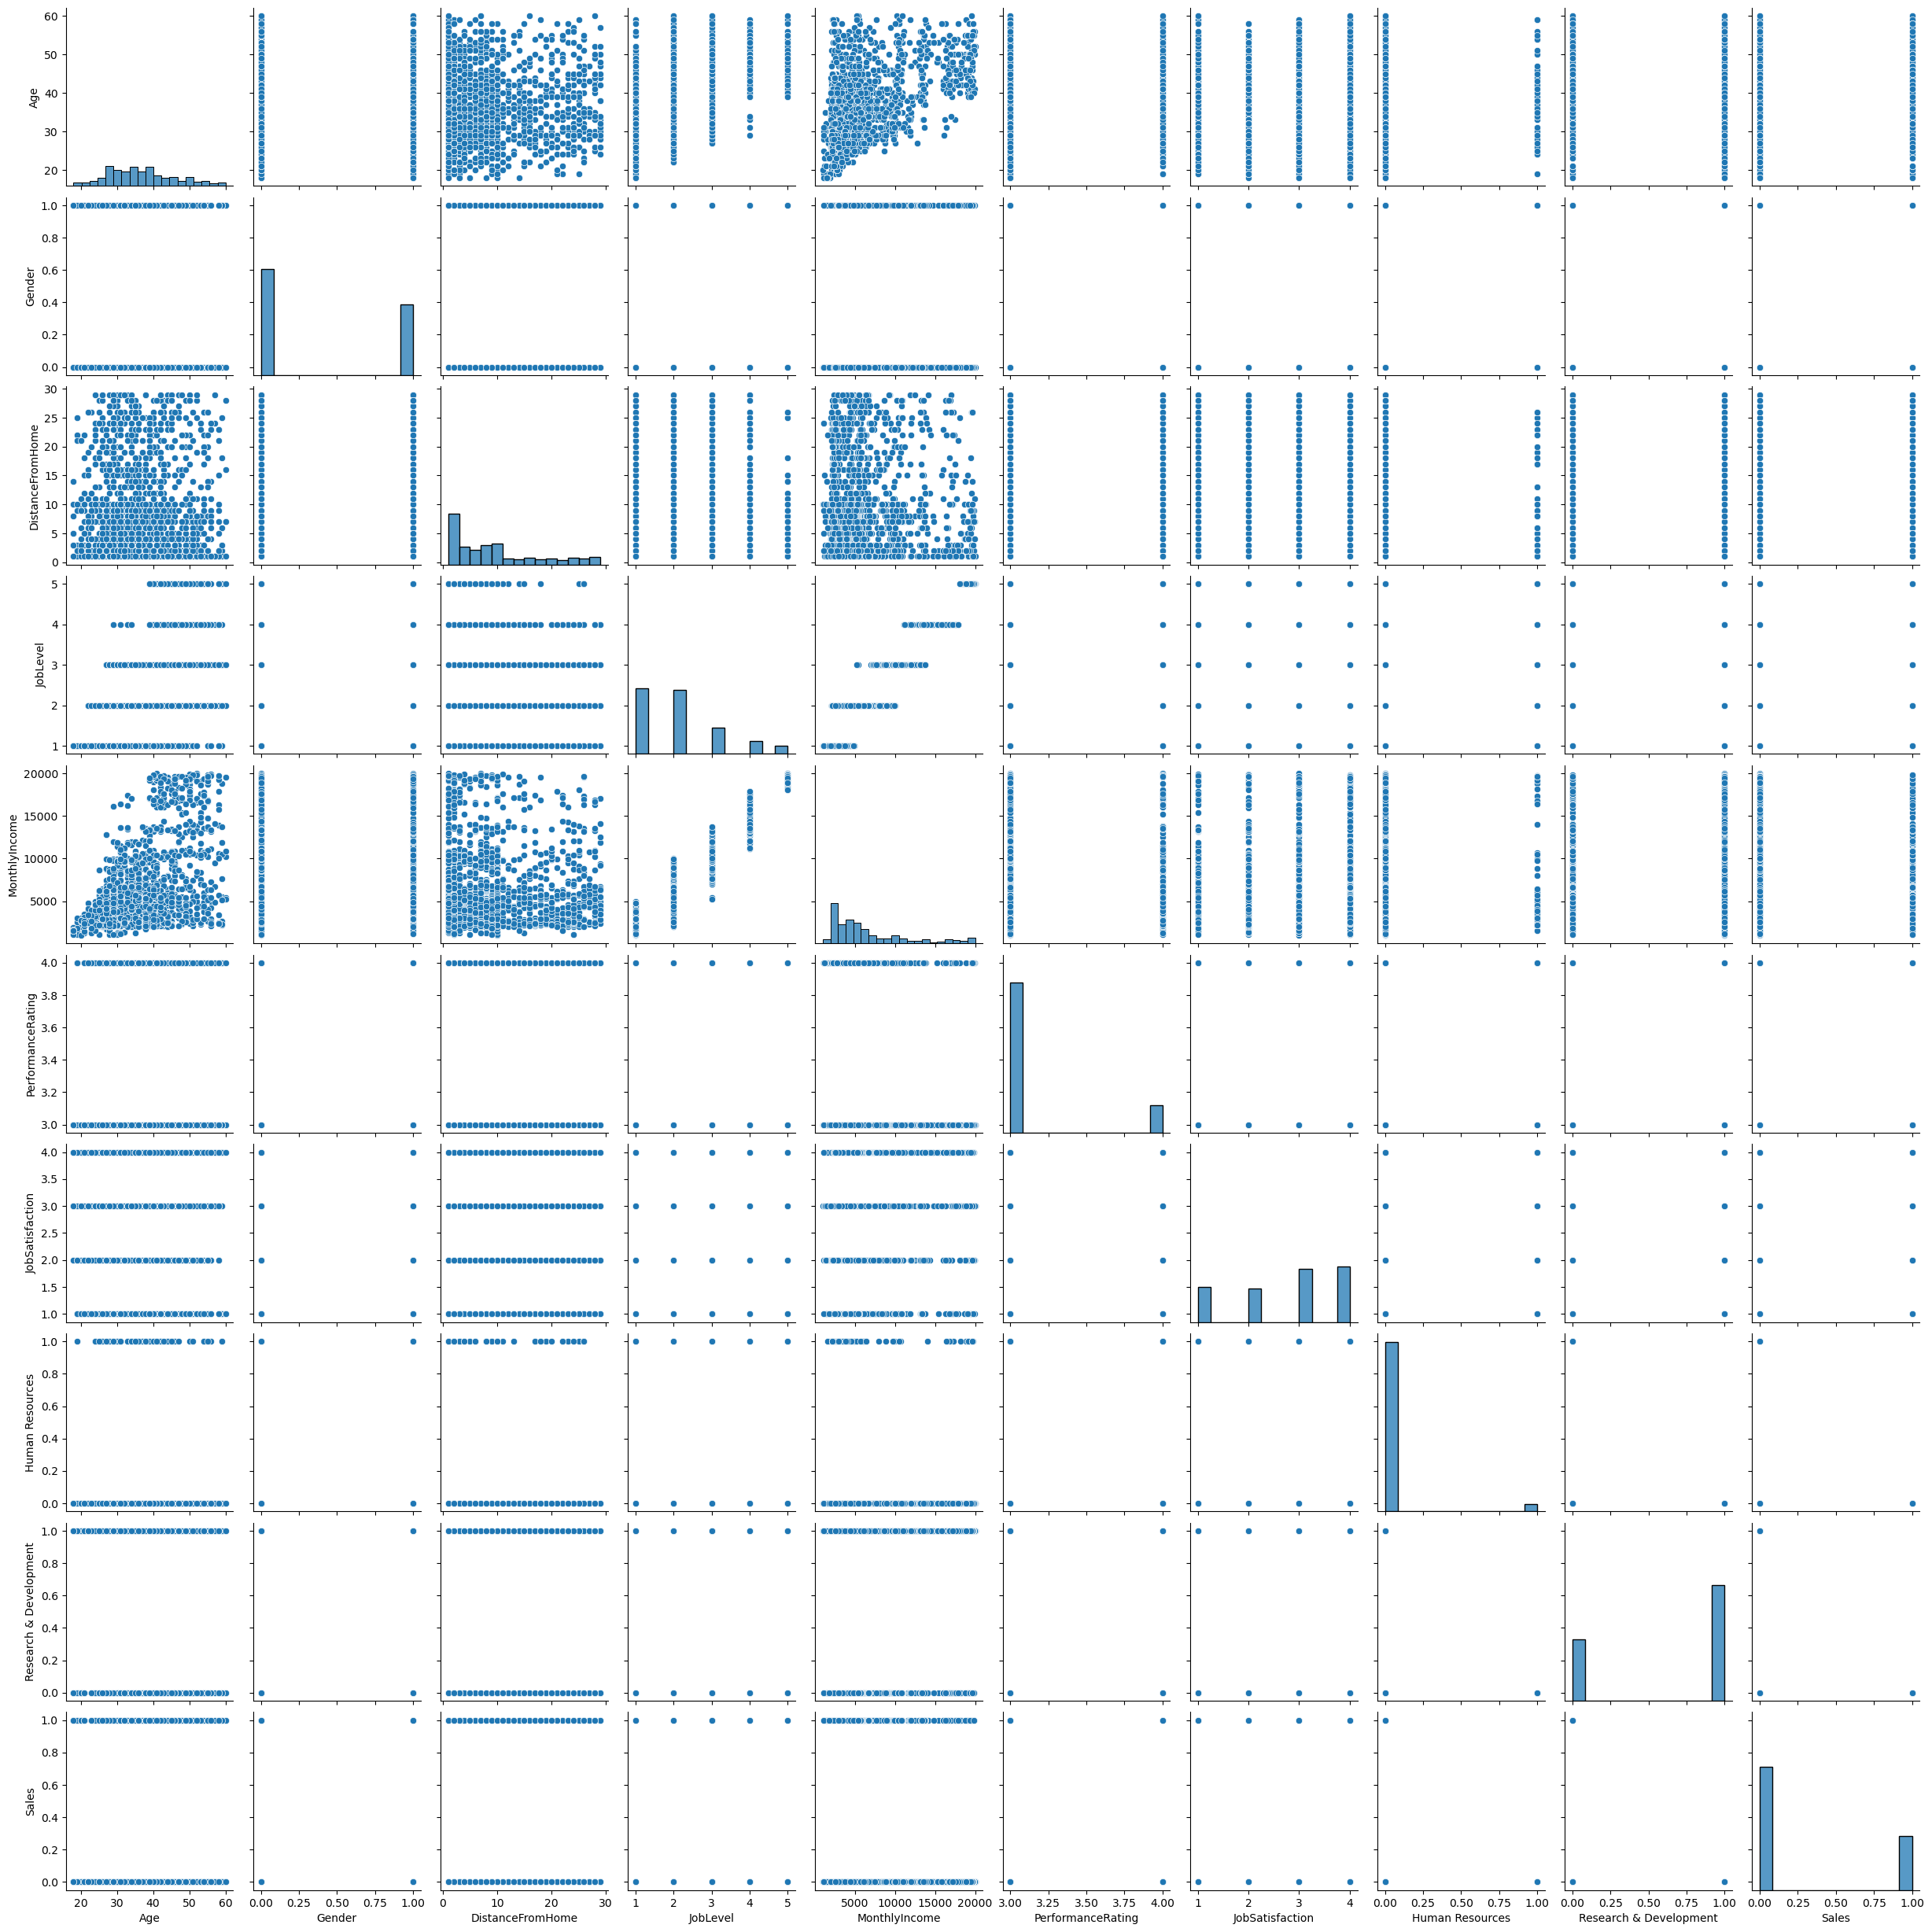

In [21]:
# create a pair plot comparing all the columns of the dataframe - what observations do you notice?
import seaborn as sns

sns.pairplot(df);

**OBSERVATIONS**:
* Age and gender seem to be pretty evenly distributed
* More people live closer to the office
* Job level and income are correlated
* There are fewer high performers
* Most people are happy with the jobs
* There are few people in HR compared to the other departments

## 2. K-Means Clustering

Let's segment the employees using K-Means clustering.

In [42]:
df.head(1)

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,41,1,1,2,5993,3,4,0,0,1


### a. Standardize the data

In [43]:
# scale the data using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254,-0.211604,-1.374051,1.515244
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853,-0.211604,0.727775,-0.659960
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200,-0.211604,0.727775,-0.659960
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200,-0.211604,0.727775,-0.659960
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853,-0.211604,0.727775,-0.659960


In [44]:
# double check that all the column means are 0 and standard deviations are 1
df_scaled.describe()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,-4.350262e-17,4.350262e-17,-2.658493e-17,-4.471102e-17,-6.114534e-16,-9.183886e-17,6.767074e-17,2.900174e-17,8.458842e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-8.164966e-01,-1.010909e+00,-9.614864e-01,-1.167343e+00,-4.262300e-01,-1.567907e+00,-2.116037e-01,-1.374051e+00,-6.599598e-01
25%,-7.581700e-01,-8.164966e-01,-8.875151e-01,-9.614864e-01,-7.632087e-01,-4.262300e-01,-6.608532e-01,-2.116037e-01,-1.374051e+00,-6.599598e-01
50%,-1.011589e-01,-8.164966e-01,-2.705440e-01,-5.778755e-02,-3.365516e-01,-4.262300e-01,2.462002e-01,-2.116037e-01,7.277751e-01,-6.599598e-01
75%,6.653541e-01,1.224745e+00,5.932157e-01,8.459113e-01,3.986245e-01,-4.262300e-01,1.153254e+00,-2.116037e-01,7.277751e-01,1.515244e+00
max,2.526886e+00,1.224745e+00,2.444129e+00,2.653309e+00,2.867626e+00,2.346151e+00,1.153254e+00,4.725816e+00,7.277751e-01,1.515244e+00


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [45]:
# import kmeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# create an empty list to hold many inertia and silhouette values
inertia_values = []
silhouette_scores = []

# create 2 - 15 clusters, and add the intertia scores and silhouette scores to the lists
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # changed from auto to 10
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean', sample_size=None))

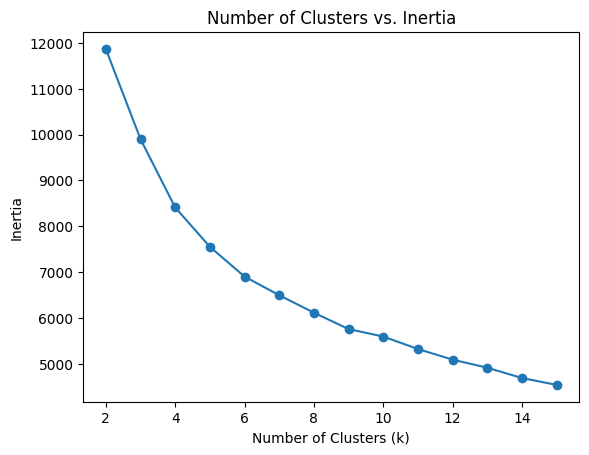

In [46]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

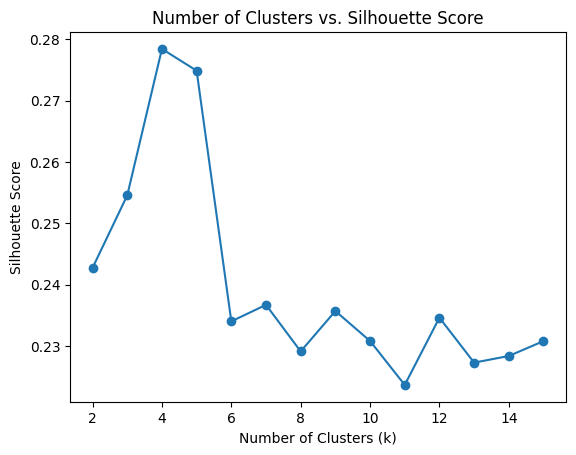

In [47]:
# plot the silhouette scores

# turn the list into a series for plotting
silhouette_series = pd.Series(silhouette_scores, index=range(2, 16))

# plot the data
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

### c. Identify a k value that looks like an elbow on the inertia plot and has a high silhouette score

In [48]:
# fit a kmeans model for the k value that you identified
kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans4.fit(df_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [49]:
# find the number of employees in each cluster
from collections import Counter

Counter(kmeans4.labels_)

Counter({0: 747, 1: 407, 2: 253, 3: 63})

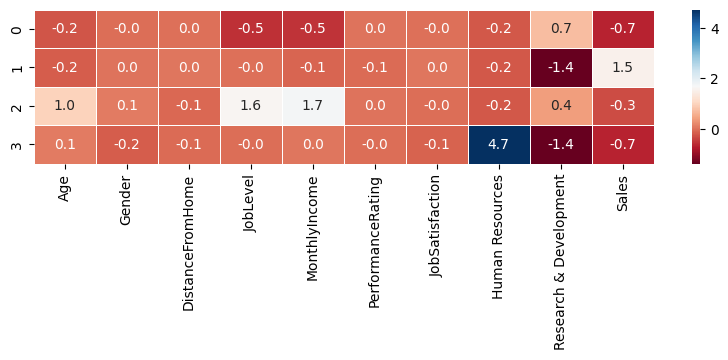

In [50]:
# create a heat map of the cluster centers
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=df_scaled.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers4, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

Interpret the clusters:
* Cluster 0: junior, research & dev employees
* Cluster 1: sales employees
* Cluster 2: senior employees
* Cluster 3: HR employees

## 3. PCA

Let's visualize the data using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [51]:
# fit a PCA model with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [52]:
# view the explained variance ratio
pca.explained_variance_ratio_

array([0.23793893, 0.18883434])

In [53]:
# view the components
pca.components_

array([[ 0.43287352,  0.04877625, -0.00285089,  0.60509274,  0.59445012,
        -0.02556521, -0.00472736,  0.02964393, -0.21392918,  0.20833797],
       [-0.21384802,  0.00840873,  0.01653328, -0.14533326, -0.17730123,
        -0.04153184,  0.01140416,  0.11374447, -0.67887246,  0.65246219]])

In [54]:
# view the columns
df_scaled.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction', 'Human Resources',
       'Research & Development', 'Sales'],
      dtype='object')

Interpret the components:
* Component 1: higher age, job level, monthly income = more senior
* Component 2: lower = research, higher = sales

### b. Overlay the K-Means cluster colors

In [55]:
# transform the data
df_scaled_transformed = pd.DataFrame(pca.transform(df_scaled), columns=['PC1', 'PC2'])
df_scaled_transformed.head()

,PC1,PC2
0,0.765263,1.853973
1,-0.031684,-1.285674
2,-1.462588,-0.645564
3,-1.449531,-0.563547
4,-1.758252,-0.473654


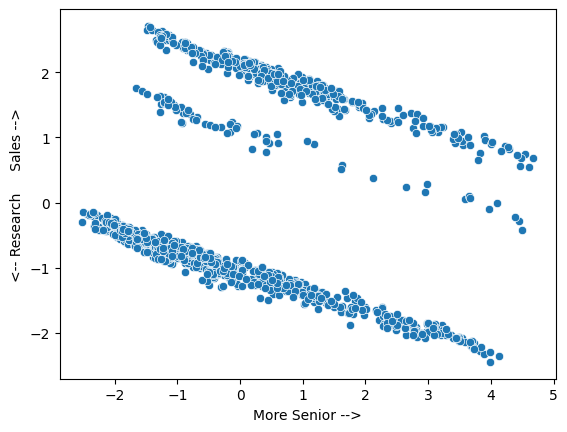

In [56]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed)
plt.xlabel('More Senior -->')
plt.ylabel('<-- Research     Sales -->');

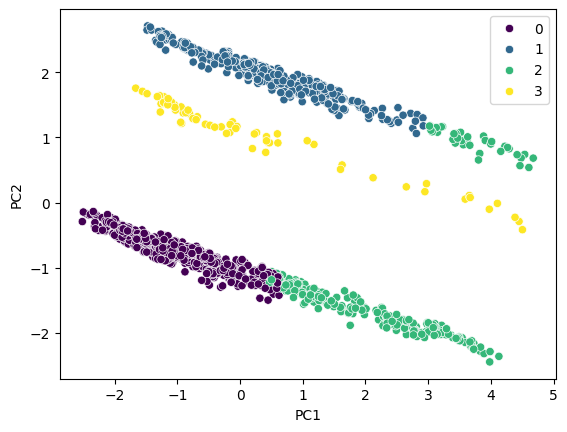

In [57]:
# overlay the kmeans clusters (hint: set the hue to be the cluster labels)
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed, hue=kmeans4.labels_, palette='viridis');

### c. Overlay the Department colors instead

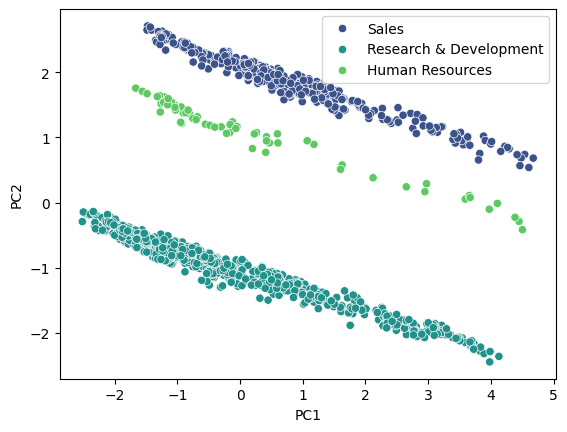

In [58]:
# overlay the department colors (hint: set the hue to be the department column)
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed, hue=employee_data.Department, palette='viridis')

plt.legend(loc='upper right');

## 4. K-Means Clustering: Round 2

Since the departments seemed to dominate the visualization, let's exclude them and try fitting more K-Means models.

### a. Create a new dataframe without the Departments

In [59]:
# create a new dataframe that excludes the three department columns from the scaled dataframe
df_scaled_v2 = df_scaled.iloc[:, :7]
df_scaled_v2.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [60]:
# write a loop to fit models with 2 to 15 clusters

# create an empty list to hold many inertia and silhouette values
inertia_values_v2 = []
silhouette_scores_v2 = []

# create 2 - 15 clusters, and add the intertia scores and silhouette scores to the lists
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # changed from auto to 10
    kmeans.fit(df_scaled_v2)
    inertia_values_v2.append(kmeans.inertia_)
    silhouette_scores_v2.append(silhouette_score(df_scaled_v2, kmeans.labels_, metric='euclidean', sample_size=None))

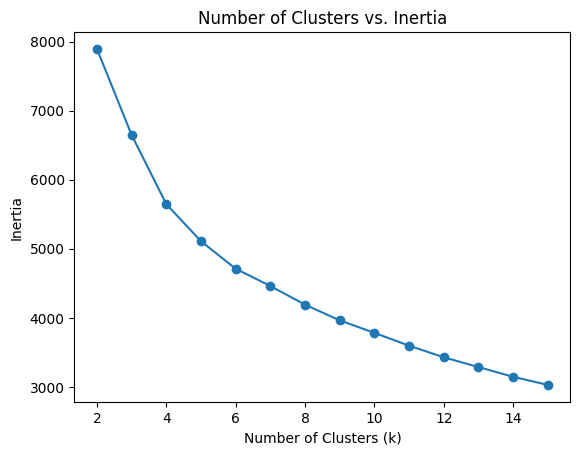

In [61]:
# plot the inertia values

# turn the list into a series for plotting
inertia_series_v2 = pd.Series(inertia_values_v2, index=range(2, 16))

# plot the data
inertia_series_v2.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

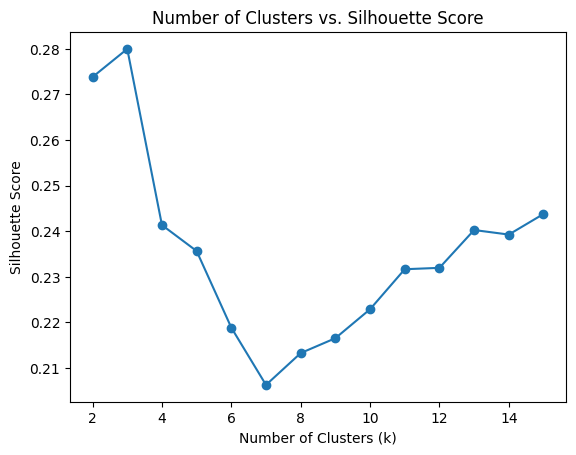

In [62]:
# plot the silhouette scores

# turn the list into a series for plotting
silhouette_series_v2 = pd.Series(silhouette_scores_v2, index=range(2, 16))

# plot the data
silhouette_series_v2.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

### c. Identify a few k values that looks like an elbow on the inertia plot and have a high silhouette score

#### i. k=3

In [63]:
# fit a kmeans model for the k value that you identified
kmeans3_v2 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans3_v2.fit(df_scaled_v2)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [64]:
# find the number of employees in each cluster
Counter(kmeans3_v2.labels_)

Counter({1: 988, 2: 282, 0: 200})

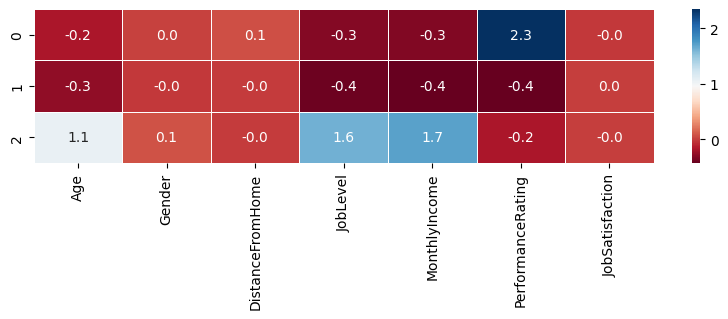

In [65]:
# create a heat map of the cluster centers
cluster_centers3_v2 = pd.DataFrame(kmeans3_v2.cluster_centers_, columns=df_scaled_v2.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers3_v2, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

Interpret the clusters:
* Cluster 0: high performing employees
* Cluster 1: junior, low performing employees
* Cluster 2: senior employees

#### ii. k=4

In [66]:
# fit a kmeans model for the k value that you identified
kmeans4_v2 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans4_v2.fit(df_scaled_v2)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [67]:
# find the number of employees in each cluster
Counter(kmeans4_v2.labels_)

Counter({2: 616, 0: 405, 1: 249, 3: 200})

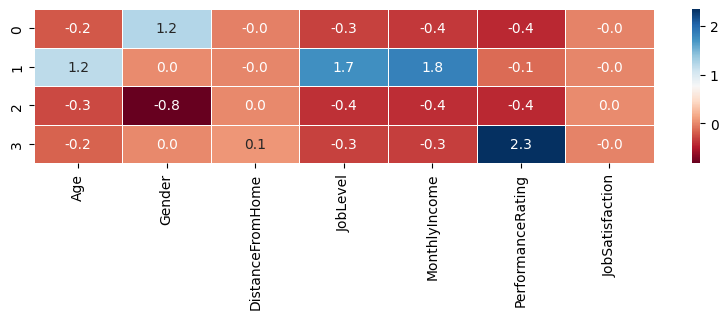

In [68]:
# create a heat map of the cluster centers
cluster_centers4_v2 = pd.DataFrame(kmeans4_v2.cluster_centers_, columns=df_scaled_v2.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers4_v2, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

Interpret the clusters:
* Cluster 0: female employees
* Cluster 1: senior employees
* Cluster 2: male employees
* Cluster 3: high performing employees

#### iii. k=6

In [69]:
# fit a kmeans model for the k value that you identified
kmeans6_v2 = KMeans(n_clusters=6, n_init=10, random_state=42)
kmeans6_v2.fit(df_scaled_v2)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [70]:
# find the number of employees in each cluster
Counter(kmeans6_v2.labels_)

Counter({3: 349, 0: 304, 4: 219, 5: 201, 1: 200, 2: 197})

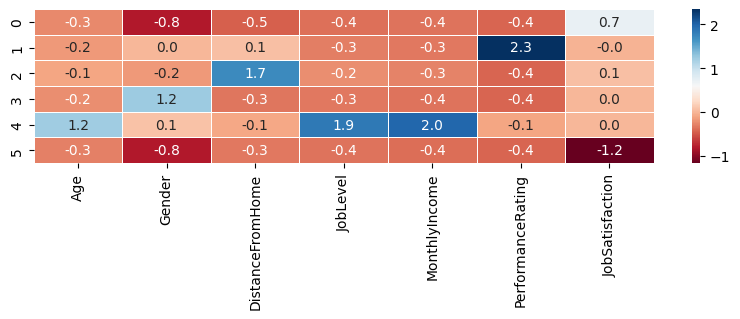

In [71]:
# create a heat map of the cluster centers
cluster_centers6_v2 = pd.DataFrame(kmeans6_v2.cluster_centers_, columns=df_scaled_v2.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers6_v2, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

Interpret the clusters:
* Cluster 0: men who like their jobs
* Cluster 1: high performers
* Cluster 2: long commuters
* Cluster 3: women
* Cluster 4: senior employee
* Cluster 5: men who dislike their jobs

## 5. PCA: Round 2

Let's visualize the data (without Departments) using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [72]:
# fit a PCA model with 2 components
from sklearn.decomposition import PCA

pca_v2 = PCA(n_components=2)
pca_v2.fit(df_scaled_v2)

PCA(n_components=2)

In [73]:
# view the explained variance ratio
pca_v2.explained_variance_ratio_ # this is higher than before

array([0.33354222, 0.14850324])

In [74]:
# view the components
pca_v2.components_

array([[ 0.47124275,  0.0460627 , -0.00629691,  0.62393147,  0.62140377,
        -0.01687984, -0.00712661],
       [ 0.01896906,  0.58615904,  0.41405416, -0.01838822, -0.02778096,
         0.4833175 , -0.49991119]])

In [75]:
# view the columns
df_scaled_v2.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction'],
      dtype='object')

Interpret the components:
* Component 1: higher age, job level, monthly income = more senior
* Component 2: <-- happy in job | women, longer commute, higher perfomring -->

### b. Overlay the K-Means cluster colors

In [76]:
# transform the data
df_scaled_transformed_v2 = pd.DataFrame(pca_v2.transform(df_scaled_v2), columns=['PC1', 'PC2'])
df_scaled_transformed_v2.head()

,PC1,PC2
0,0.168712,-0.470665
1,0.334248,0.959030
2,-1.205213,-1.131272
3,-1.210236,0.103169
4,-1.532824,-0.706731


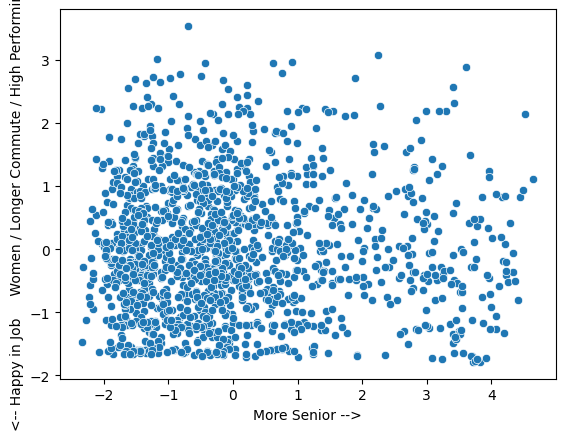

In [77]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed_v2)
plt.xlabel('More Senior -->')
plt.ylabel('<-- Happy in Job     Women / Longer Commute / High Performing -->');

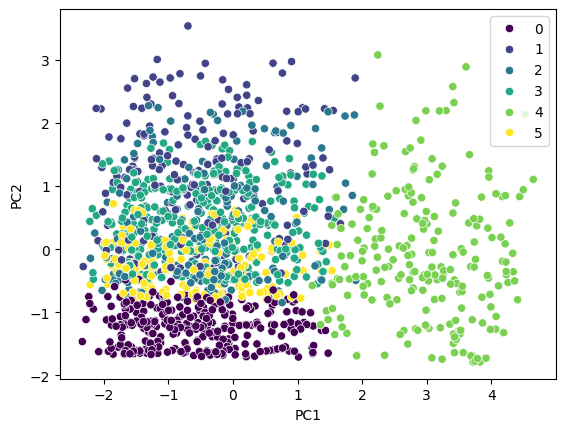

In [78]:
# overlay the kmeans clusters (choose your favorite k-means model from the previous section)
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed_v2, hue=kmeans6_v2.labels_, palette='viridis');

### c. OPTIONAL: Create a 3D plot

In [79]:
# fit a PCA model with 3 components
pca3_v2 = PCA(n_components=3)
pca3_v2.fit(df_scaled_v2)

PCA(n_components=3)

In [80]:
# view the explained variance ratio
pca3_v2.explained_variance_ratio_ # this is higher than before

array([0.33354222, 0.14850324, 0.14578114])

In [81]:
# view the components
pca3_v2.components_

array([[ 0.47124275,  0.0460627 , -0.00629691,  0.62393147,  0.62140377,
        -0.01687984, -0.00712661],
       [ 0.01896906,  0.58615904,  0.41405416, -0.01838822, -0.02778096,
         0.4833175 , -0.49991119],
       [ 0.02702996, -0.36313603,  0.55488385,  0.02159616,  0.01065236,
         0.52050007,  0.53666127]])

In [82]:
# view the columns
df_scaled_v2.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction'],
      dtype='object')

Interpret the components:
* Component 1: higher age, job level, monthly income = more senior
* Component 2: <-- happy in job | women, longer commute, higher perfomring -->
* Component 3: longer commute, higher performance, happy in job

In [83]:
# transform the data
df_scaled_transformed3_v2 = pd.DataFrame(pca3_v2.transform(df_scaled_v2), columns=['PC1', 'PC2', 'PC3'])
df_scaled_transformed3_v2.head()

,PC1,PC2,PC3
0,0.168712,-0.470665,-0.598970
1,0.334248,0.959030,1.112754
2,-1.205213,-1.131272,-0.316222
3,-1.210236,0.103169,-0.998987
4,-1.532824,-0.706731,-0.829482


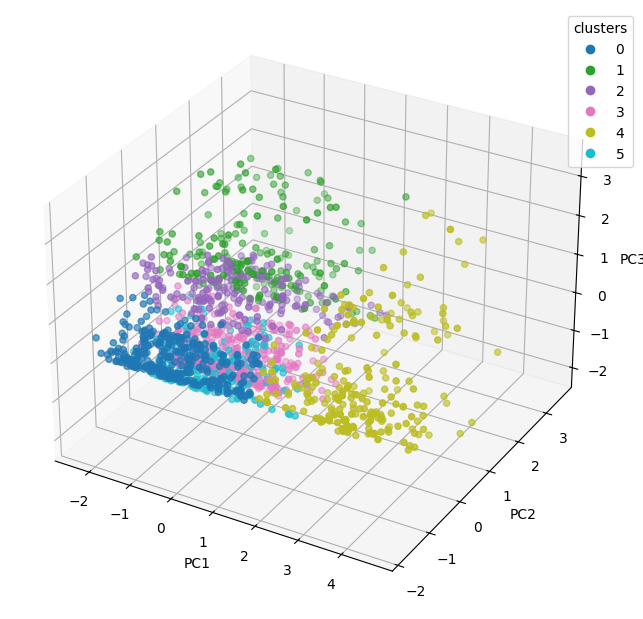

In [84]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# combine the data and cluster labels
cluster_labels = pd.Series(kmeans6_v2.labels_, name='cluster')

# create a clean dataframe
df_clean = pd.concat([df_scaled_transformed3_v2, cluster_labels], axis=1)

# create a 3d scatter plot
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

# specify the data and labels
sc = ax.scatter(df_clean['PC1'], df_clean['PC2'], df_clean['PC3'],
                c=df_clean['cluster'], cmap='tab10')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# add a legend
plt.legend(*sc.legend_elements(), title='clusters',
           bbox_to_anchor=(1.05, 1));

## 6. EDA on Clusters

Let's decide to go with the 6 clusters without department data.

### a. Confirm the 6 clusters

In [85]:
# view the kmeans model with 6 clusters
kmeans6_v2

KMeans(n_clusters=6, n_init=10, random_state=42)

In [86]:
# view the cluster labels
kmeans6_v2.labels_

array([3, 1, 0, ..., 1, 5, 0])

### b. Create a dataframe with the cluster labels and names

In [103]:
# create a dataframe with two columns - one of the label and another of the cluster name
clusters = pd.DataFrame(kmeans6_v2.labels_, columns=['Cluster'])
clusters.head()

,Cluster
0,3
1,1
2,0
3,3
4,5


In [104]:
# create a mapping for the cluster names
cluster_mapping = {0: 'Men who like their jobs',
                   1: 'High performers',
                   2: 'Long commuters',
                   3: 'Female employees',
                   4: 'Senior employees',
                   5: 'Men who dislike their jobs'}

In [105]:
# combine the labels and names into a single dataframe
clusters['Cluster_Name'] = clusters['Cluster'].map(cluster_mapping)
clusters.head()

,Cluster,Cluster_Name
0,3,Female employees
1,1,High performers
2,0,Men who like their jobs
3,3,Female employees
4,5,Men who dislike their jobs


### c. View the attrition rates for each cluster

In [101]:
data.head(3)

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,1,0,0,1
1,1002,49,0,8,2,5130,4,2,0,0,1,0
2,1004,37,0,2,1,2090,3,3,1,0,1,0


In [106]:
clusters.head(3)

,Cluster,Cluster_Name
0,3,Female employees
1,1,High performers
2,0,Men who like their jobs


In [107]:
# combine the clusters and attrition data
clusters = pd.concat([clusters, data.Attrition], axis=1)
clusters.head()

,Cluster,Cluster_Name,Attrition
0,3,Female employees,1
1,1,High performers,0
2,0,Men who like their jobs,1
3,3,Female employees,0
4,5,Men who dislike their jobs,0


In [108]:
# what is the attrition rate for each cluster?
clusters.groupby(['Cluster_Name'])['Attrition'].mean()

Cluster_Name
Female employees              0.154728
High performers               0.185000
Long commuters                0.218274
Men who dislike their jobs    0.189055
Men who like their jobs       0.161184
Senior employees              0.073059
Name: Attrition, dtype: float64

In [109]:
# sort the values
clusters.groupby(['Cluster_Name'])['Attrition'].mean().sort_values(ascending=False)

Cluster_Name
Long commuters                0.218274
Men who dislike their jobs    0.189055
High performers               0.185000
Men who like their jobs       0.161184
Female employees              0.154728
Senior employees              0.073059
Name: Attrition, dtype: float64

Interpret the findings:
* Long commuters are most likely to leave
* Senior employees are most likely to stay

In [110]:
# find the number of employees in each cluster
clusters.Cluster.value_counts()

Cluster
3    349
0    304
4    219
5    201
1    200
2    197
Name: count, dtype: int64

### d. View the department breakdown for each cluster

In [111]:
# combine the clusters and department data
clusters = pd.concat([clusters, employee_data.Department], axis=1)
clusters.head()

,Cluster,Cluster_Name,Attrition,Department
0,3,Female employees,1,Sales
1,1,High performers,0,Research & Development
2,0,Men who like their jobs,1,Research & Development
3,3,Female employees,0,Research & Development
4,5,Men who dislike their jobs,0,Research & Development


In [112]:
# what is the attrition rate for each cluster + department combination?
clusters.groupby(['Cluster_Name', 'Department']).mean()

Cluster  Attrition
Cluster_Name               Department                                
Female employees           Human Resources             3.0   0.300000
                           Research & Development      3.0   0.121076
                           Sales                       3.0   0.206897
High performers            Human Resources             1.0   0.142857
                           Research & Development      1.0   0.188406
                           Sales                       1.0   0.181818
Long commuters             Human Resources             2.0   0.666667
                           Research & Development      2.0   0.153846
                           Sales                       2.0   0.311475
Men who dislike their jobs Human Resources             5.0   0.214286
                           Research & Development      5.0   0.172131
                           Sales                       5.0   0.215385
Men who like their jobs    Human Resources             0.0   0.071429
                           Research & Development      0.0   0.152284
                           Sales                       0.0   0.193548
Senior employees           Human Resources             4.0   0.000000
                           Research & Development      4.0   0.059603
                           Sales                       4.0   0.125000

In [113]:
# sort the values
clusters.groupby(['Cluster_Name', 'Department']).mean().sort_values('Attrition', ascending=False)

Cluster  Attrition
Cluster_Name               Department                                
Long commuters             Human Resources             2.0   0.666667
                           Sales                       2.0   0.311475
Female employees           Human Resources             3.0   0.300000
Men who dislike their jobs Sales                       5.0   0.215385
                           Human Resources             5.0   0.214286
Female employees           Sales                       3.0   0.206897
Men who like their jobs    Sales                       0.0   0.193548
High performers            Research & Development      1.0   0.188406
                           Sales                       1.0   0.181818
Men who dislike their jobs Research & Development      5.0   0.172131
Long commuters             Research & Development      2.0   0.153846
Men who like their jobs    Research & Development      0.0   0.152284
High performers            Human Resources             1.0   0.142857
Senior employees           Sales                       4.0   0.125000
Female employees           Research & Development      3.0   0.121076
Men who like their jobs    Human Resources             0.0   0.071429
Senior employees           Research & Development      4.0   0.059603
                           Human Resources             4.0   0.000000

Interpret the findings:
* The groups most likely to leave are people with long commutes, women in HR and those in HR and sales
* The groups most likely NOT to leave are senior employees, men who like their jobs and those in research and development

In [114]:
# find the number of employees in each cluster + department combo
clusters.groupby(['Cluster_Name', 'Department']).count()

Cluster  Attrition
Cluster_Name               Department                                
Female employees           Human Resources              10         10
                           Research & Development      223        223
                           Sales                       116        116
High performers            Human Resources               7          7
                           Research & Development      138        138
                           Sales                        55         55
Long commuters             Human Resources               6          6
                           Research & Development      130        130
                           Sales                        61         61
Men who dislike their jobs Human Resources              14         14
                           Research & Development      122        122
                           Sales                        65         65
Men who like their jobs    Human Resources              14         14
                           Research & Development      197        197
                           Sales                        93         93
Senior employees           Human Resources              12         12
                           Research & Development      151        151
                           Sales                        56         56

## 7. Make Recommendations

In [115]:
# looking at the clusters, what segment info would you share with the team?
clusters.groupby(['Cluster_Name'])['Attrition'].mean().sort_values(ascending=False)

Cluster_Name
Long commuters                0.218274
Men who dislike their jobs    0.189055
High performers               0.185000
Men who like their jobs       0.161184
Female employees              0.154728
Senior employees              0.073059
Name: Attrition, dtype: float64

In [78]:
# What recommendations would you suggest to retain employees in each cluster?

Higher attrition:
* Long commuters: find remote options, create a more inclusive remote culture
* Men who dislike their jobs: have their managers have conversations with them
* Higher performers: find opportunities for more senior positions

Lower attrition:

* Senior employees: this makes sense that they have less attrition since they've been around a long time
* Female employees: this is an interesting finding, dig more into why this is the case
* Men who like their jobs: this make sense that people who like their job would stay